#### Logisitc Regression

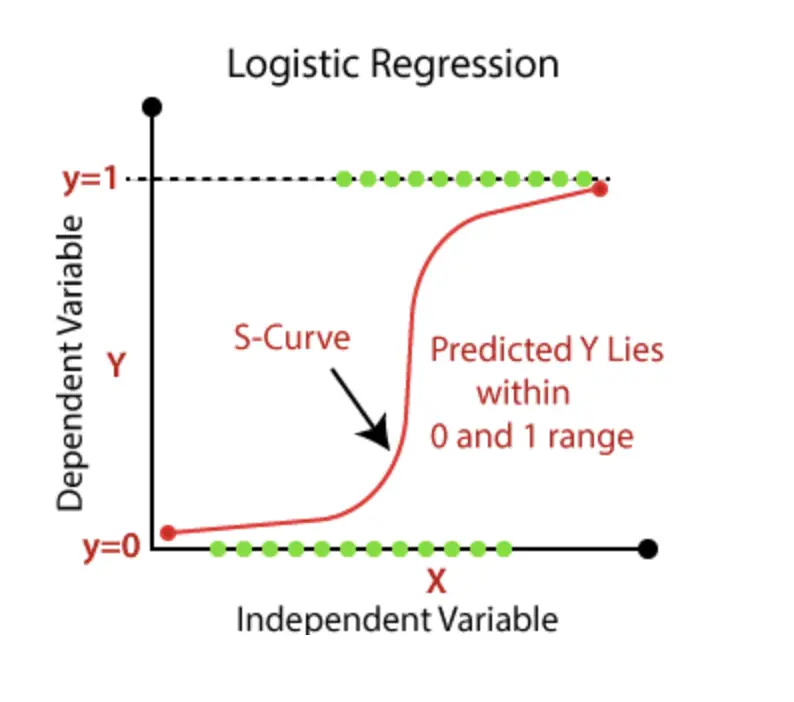

- Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. 

- Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

#### Assumptions of Logistic Regression

- Independent observations: Each observation is independent of the other. meaning there is no correlation between any input variables.
- Binary dependent variables: It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two categories SoftMax functions are used.
- Linearity relationship between independent variables and log odds: The relationship between the independent variables and the log odds of the dependent variable should be linear.
- No outliers: There should be no outliers in the dataset. Large sample size: The sample size is sufficiently large

#### How does it work?

- Logistic regression models the relationship between a categorical dependent variable and independent variables.
- It estimates the probability of an observation belonging to a category using the logistic function.
- The logistic function transforms the linear combination of predictor variables into a value between 0 and 1.
- These probabilities are used for binary classification decisions.
- Coefficients are adjusted during training to maximize the likelihood of observing actual outcomes.
- Logistic regression allows for the interpretation of the relationship between independent variables and the probability of the outcome.
- It provides a method for predicting binary outcomes with interpretable results.

#### Formula

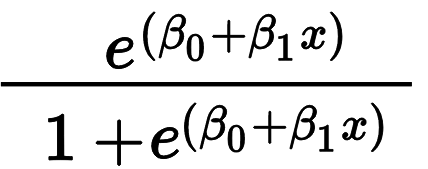

#### Importing libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

#### Loading the dataset

In [2]:
df = pd.read_csv('D:\SEM 4\Supervised Machine Learning Lab\\diabetes2.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Basic EDA

In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y

2      1
3      0
4      1
5      0
6      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 766, dtype: int64

#### Dividing the dataset into train and test

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#### Finding the optimal parameters

In [19]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [22]:
classifier=LogisticRegression()

In [23]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [24]:
classifier_regressor.fit(X_train,y_train)

C:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [25]:
classifier_regressor.best_params_

{'C': 20, 'max_iter': 100, 'penalty': 'l2'}

In [26]:
classifier_regressor.best_score_

0.7761162201785952

In [27]:
y_pred=classifier_regressor.predict(X_test)

#### Evaluation using metrics

In [28]:
score=accuracy_score(y_pred,y_test)
score

0.7987012987012987

In [29]:
classification_report = classification_report(y_pred,y_test)
classification_report

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86       112\n           1       0.62      0.67      0.64        42\n\n    accuracy                           0.80       154\n   macro avg       0.75      0.76      0.75       154\nweighted avg       0.80      0.80      0.80       154\n'